In [1]:
# TIME SERIES FORECASTING

In [43]:
import pandas as pd
import datetime as dt
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [41]:
df = pd.read_csv('/content/census.csv')

In [42]:
df.head()

,Unnamed: 0,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,11060148,0.3601,886,84.53
1,2,North Twenty Four Parganas,West Bengal,10009781,0.1204,955,84.06
2,3,Bangalore,Karnataka,9621551,0.4718,916,87.67
3,4,Pune,Maharashtra,9429408,0.3037,915,86.15
4,5,Mumbai Suburban,Maharashtra,9356962,0.0829,860,89.91


In [6]:
df['update pop'] = (df['Population'] * 11.2/100) + df['Population']
df['50% for herd immunity'] = df['update pop']/2
df

,Unnamed: 0,District,State,Population,Growth,Sex-Ratio,Literacy,update pop,50% for herd immunity
0,1,Thane,Maharashtra,11060148,0.3601,886,84.53,1.229888e+07,6149442.288
1,2,North Twenty Four Parganas,West Bengal,10009781,0.1204,955,84.06,1.113088e+07,5565438.236
2,3,Bangalore,Karnataka,9621551,0.4718,916,87.67,1.069916e+07,5349582.356
3,4,Pune,Maharashtra,9429408,0.3037,915,86.15,1.048550e+07,5242750.848
4,5,Mumbai Suburban,Maharashtra,9356962,0.0829,860,89.91,1.040494e+07,5202470.872
...,...,...,...,...,...,...,...,...,...
635,636,Nicobars,Andaman And Nicobar Islands,36842,-0.1242,777,78.06,4.096830e+04,20484.152
636,637,Upper Siang,Arunachal Pradesh,35320,0.0587,889,59.99,3.927584e+04,19637.920
637,638,Lahul and Spiti,Himachal Pradesh,31564,-0.0500,903,76.81,3.509917e+04,17549.584
638,639,Anjaw,Arunachal Pradesh,21167,0.1419,839,56.46,2.353770e+04,11768.852


In [7]:
a2 = pd.DataFrame()
for i in range(len(df)):
    if df.iloc[i]['State'] == 'Andhra Pradesh':
        a2 = a2.append(df.iloc[i])

print(len(a2))
a2

23


,50% for herd immunity,District,Growth,Literacy,Population,Sex-Ratio,State,Unnamed: 0,update pop
16,2944987.996,Rangareddy,0.4816,75.87,5296741.0,961.0,Andhra Pradesh,17.0,5889975.992
18,2865788.576,East Godavari,0.0516,70.99,5154296.0,1006.0,Andhra Pradesh,19.0,5731577.152
21,2717624.028,Guntur,0.0947,67.40,4887813.0,1003.0,Andhra Pradesh,22.0,5435248.056
33,2511673.288,Krishna,0.0787,73.74,4517398.0,992.0,Andhra Pradesh,34.0,5023346.576
43,2385567.484,Visakhapatnam,0.1196,66.91,4290589.0,1006.0,Andhra Pradesh,44.0,4771134.968
46,2320779.584,Chittoor,0.1143,71.53,4174064.0,997.0,Andhra Pradesh,47.0,4641559.168
51,2269118.288,Anantapur,0.1210,63.57,4081148.0,977.0,Andhra Pradesh,52.0,4538236.576
53,2253725.428,Kurnool,0.1485,59.97,4053463.0,988.0,Andhra Pradesh,54.0,4507450.856
54,2253483.568,Mahbubnagar,0.1534,55.04,4053028.0,977.0,Andhra Pradesh,55.0,4506967.136
59,2192487.588,Hyderabad,0.0297,83.25,3943323.0,954.0,Andhra Pradesh,60.0,4384975.176


In [8]:
data1 = pd.read_csv("https://api.covid19india.org/csv/latest/districts.csv")
data1

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,2679.0
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN
...,...,...,...,...,...,...,...,...
161641,2021-01-05,West Bengal,Purba Bardhaman,12354,12068,95,0,NaN
161642,2021-01-05,West Bengal,Purba Medinipur,20231,19484,275,0,NaN
161643,2021-01-05,West Bengal,Purulia,6990,6716,47,0,NaN
161644,2021-01-05,West Bengal,South 24 Parganas,36205,35438,687,0,NaN


In [10]:
a1 = pd.DataFrame()
for i in range(len(data1)):
    if data1.iloc[i]['State'] == 'Andhra Pradesh':
        a1 = a1.append(data1.iloc[i])

In [11]:
m = a1.tail(15)
m

,Confirmed,Date,Deceased,District,Other,Recovered,State,Tested
160994,67397.0,2021-01-05,597.0,Anantapur,0.0,66682.0,Andhra Pradesh,809025.0
160995,86325.0,2021-01-05,844.0,Chittoor,0.0,85233.0,Andhra Pradesh,791735.0
160996,123785.0,2021-01-05,636.0,East Godavari,0.0,122815.0,Andhra Pradesh,967422.0
160997,434.0,2021-01-05,0.0,Foreign Evacuees,0.0,434.0,Andhra Pradesh,NaN
160998,74872.0,2021-01-05,666.0,Guntur,0.0,73728.0,Andhra Pradesh,852177.0
160999,47926.0,2021-01-05,666.0,Krishna,0.0,46759.0,Andhra Pradesh,803134.0
161000,60602.0,2021-01-05,487.0,Kurnool,0.0,60043.0,Andhra Pradesh,892927.0
161001,2461.0,2021-01-05,0.0,Other State,0.0,2461.0,Andhra Pradesh,NaN
161002,62049.0,2021-01-05,579.0,Prakasam,0.0,61388.0,Andhra Pradesh,711492.0
161003,62124.0,2021-01-05,506.0,S.P.S. Nellore,0.0,61181.0,Andhra Pradesh,692285.0


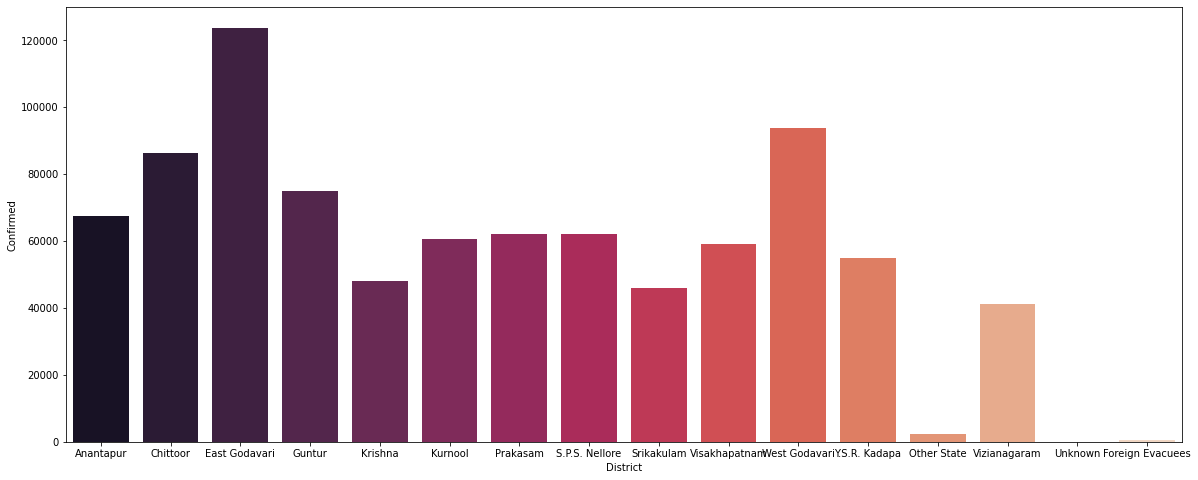

In [12]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'District', y = m['Confirmed'],data=a1, palette = 'rocket')

In [13]:
b1 = pd.DataFrame()
for i in range(len(a1)):
    if a1.iloc[i]['District'] == 'East Godavari':
        b1 = b1.append(a1.iloc[i])
b1

,Confirmed,Date,Deceased,District,Other,Recovered,State,Tested
3,39.0,2020-04-26,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
411,39.0,2020-04-27,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
832,39.0,2020-04-28,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
1260,40.0,2020-04-29,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
1693,42.0,2020-04-30,0.0,East Godavari,0.0,14.0,Andhra Pradesh,NaN
...,...,...,...,...,...,...,...,...
158384,123740.0,2021-01-01,636.0,East Godavari,0.0,122723.0,Andhra Pradesh,967422.0
159037,123755.0,2021-01-02,636.0,East Godavari,0.0,122747.0,Andhra Pradesh,967422.0
159690,123766.0,2021-01-03,636.0,East Godavari,0.0,122795.0,Andhra Pradesh,967422.0
160343,123785.0,2021-01-04,636.0,East Godavari,0.0,122815.0,Andhra Pradesh,967422.0


In [14]:
b1['daily increase'] = b1['Confirmed'].diff()
b1['daily recovery'] = b1['Recovered'].diff()
b1.fillna(0)

,Confirmed,Date,Deceased,District,Other,Recovered,State,Tested,daily increase,daily recovery
3,39.0,2020-04-26,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,0.0,0.0
411,39.0,2020-04-27,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,0.0,0.0
832,39.0,2020-04-28,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,0.0,0.0
1260,40.0,2020-04-29,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,1.0,0.0
1693,42.0,2020-04-30,0.0,East Godavari,0.0,14.0,Andhra Pradesh,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
158384,123740.0,2021-01-01,636.0,East Godavari,0.0,122723.0,Andhra Pradesh,967422.0,45.0,16.0
159037,123755.0,2021-01-02,636.0,East Godavari,0.0,122747.0,Andhra Pradesh,967422.0,15.0,24.0
159690,123766.0,2021-01-03,636.0,East Godavari,0.0,122795.0,Andhra Pradesh,967422.0,11.0,48.0
160343,123785.0,2021-01-04,636.0,East Godavari,0.0,122815.0,Andhra Pradesh,967422.0,19.0,20.0


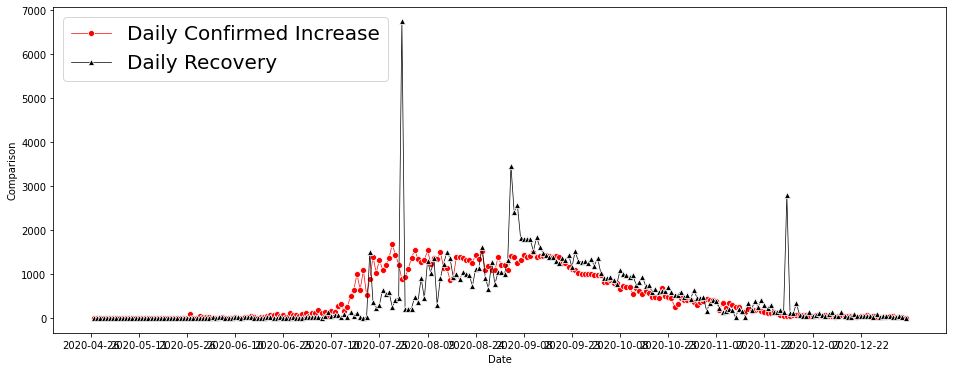

In [15]:
plt.figure(figsize = (16,6))
sns.lineplot(x = b1['Date'], y = b1['daily increase'], color = 'red', marker = "o",label = 'Daily Confirmed Increase', lw = 0.7)
sns.lineplot(x = b1['Date'], y = b1['daily recovery'], color = 'black', marker = "^", label = 'Daily Recovery', lw = 0.7)
plt.xticks(range(0,252, 15))
plt.ylabel('Comparison')
plt.legend(loc ='upper left', prop={'size': 20})

In [16]:

b2 = pd.DataFrame(b1,columns=['Date','daily increase'])
b2['daily increase'] = b2['daily increase'].fillna(0)
b2_new = b2.drop(3)
b2_new

,Date,daily increase
411,2020-04-27,0.0
832,2020-04-28,0.0
1260,2020-04-29,1.0
1693,2020-04-30,2.0
2128,2020-05-01,0.0
...,...,...
158384,2021-01-01,45.0
159037,2021-01-02,15.0
159690,2021-01-03,11.0
160343,2021-01-04,19.0


In [17]:
from google.colab import files

In [18]:
b2.to_excel('b2.xlsx')
files.download('b2.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import datetime
def parser(x):
  return datetime.datetime.strptime(x,"%Y-%m-%d")
dataA = pd.read_csv('/content/b2_increase.csv',index_col='Date', parse_dates=['Date'],date_parser=parser)  
dataA= dataA. loc[:, ~dataA. columns. str. contains('^Unnamed')]
dataA

,daily increase
Date,
2020-04-26,0
2020-04-27,0
2020-04-28,0
2020-04-29,1
2020-04-30,2
...,...
2020-12-31,42
2021-01-01,45
2021-01-02,15


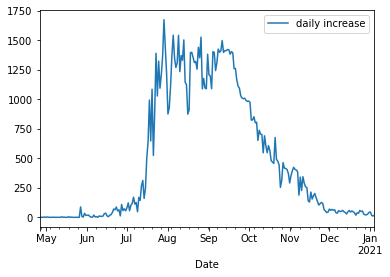

In [44]:
dataA.plot()

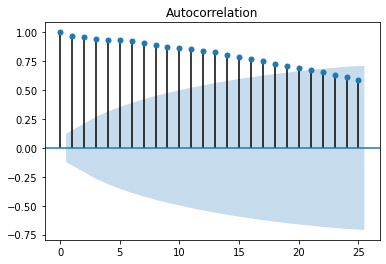

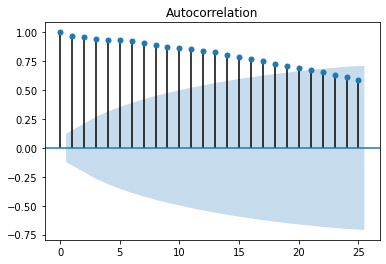

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataA) #to check whether it is stationary or not(time series cannot work on non stationary data)

In [46]:
dataA_diff=dataA.diff(periods=1)
dataA_diff = dataA_diff[1:]
dataA_diff

,daily increase
Date,
2020-04-27,0.0
2020-04-28,0.0
2020-04-29,1.0
2020-04-30,1.0
2020-05-01,-2.0
...,...
2020-12-31,14.0
2021-01-01,3.0
2021-01-02,-30.0


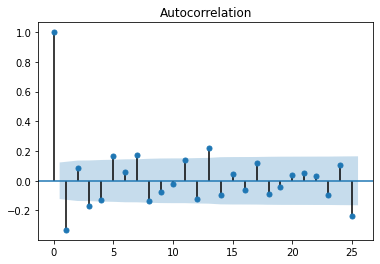

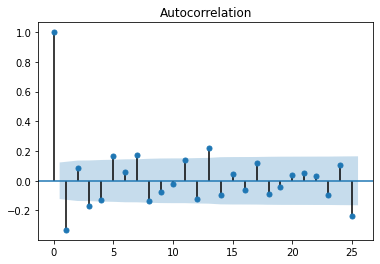

In [47]:
plot_acf(dataA_diff)

In [48]:
X= dataA.values
X.size
train = X[0:178]
test = X[178:]
predictions = []

In [49]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [50]:
model_ar= AR(train)
model_ar_fit=model_ar.fit()

In [51]:
predictions = model_ar_fit.predict(start=178,end=254)

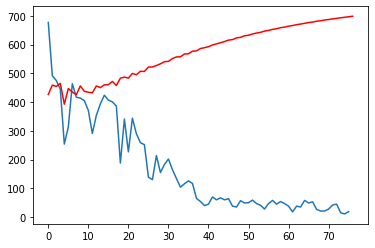

In [52]:
plt.plot(test)
plt.plot(predictions,color='red')

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
model_arima=ARIMA(train,order=(7,2,3))#best fit combo of p,d,q
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

2214.0680680621526


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



In [36]:

predictions= model_arima_fit.forecast(steps=30)[0]
predictions

array([416.44297242, 436.36224255, 463.31787735, 407.05243645,
       367.88910472, 393.74103194, 387.5196838 , 350.15629779,
       354.67383442, 355.1170356 , 313.03527795, 300.59661524,
       317.11162104, 293.66847541, 261.38576196, 265.71173205,
       258.09267842, 225.1794484 , 218.19357552, 220.11839083,
       191.91691971, 169.91639455, 171.95578589, 156.48022054,
       128.40446061, 122.12432521, 114.90309278,  87.79489245,
        71.85804838,  68.12313289])

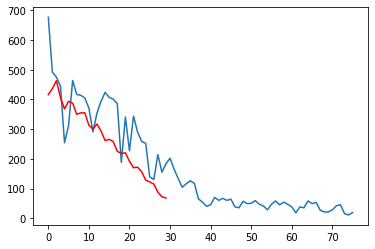

In [37]:
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
import  itertools
p=d=q=range(0,8)
pdq = list(itertools.product(p,d,q))
pdq

In [ ]:
for param in pdq:
  try:
    model_arima=ARIMA(train,order=param)
    model_arima_fit=model_arima.fit()
    print(param,model_arima_fit.aic)
  except:
    continue  


In [56]:
# dates vs daily recovery
b1

,Confirmed,Date,Deceased,District,Other,Recovered,State,Tested,daily increase,daily recovery
3,39.0,2020-04-26,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN,NaN,NaN
411,39.0,2020-04-27,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN,0.0,0.0
832,39.0,2020-04-28,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN,0.0,0.0
1260,40.0,2020-04-29,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN,1.0,0.0
1693,42.0,2020-04-30,0.0,East Godavari,0.0,14.0,Andhra Pradesh,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
158384,123740.0,2021-01-01,636.0,East Godavari,0.0,122723.0,Andhra Pradesh,967422.0,45.0,16.0
159037,123755.0,2021-01-02,636.0,East Godavari,0.0,122747.0,Andhra Pradesh,967422.0,15.0,24.0
159690,123766.0,2021-01-03,636.0,East Godavari,0.0,122795.0,Andhra Pradesh,967422.0,11.0,48.0
160343,123785.0,2021-01-04,636.0,East Godavari,0.0,122815.0,Andhra Pradesh,967422.0,19.0,20.0


In [57]:
b3 = pd.DataFrame(b1,columns=['Date','daily recovery'])
b3['daily recovery'] = b3['daily recovery'].fillna(0)
b3_new = b3.drop(3)
b3_new

,Date,daily recovery
411,2020-04-27,0.0
832,2020-04-28,0.0
1260,2020-04-29,0.0
1693,2020-04-30,2.0
2128,2020-05-01,3.0
...,...,...
158384,2021-01-01,16.0
159037,2021-01-02,24.0
159690,2021-01-03,48.0
160343,2021-01-04,20.0


In [58]:
from google.colab import files

In [59]:
b3.to_excel('b3.xlsx')
files.download('b3.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
import datetime
def parser(x):
  return datetime.datetime.strptime(x,"%Y-%m-%d")
dataB = pd.read_csv('/content/b3_recovery.csv',index_col='Date', parse_dates=['Date'],date_parser=parser)  
dataB= dataB. loc[:, ~dataB. columns. str. contains('^Unnamed')]
dataB

,daily recovery
Date,
2020-04-26,0
2020-04-27,0
2020-04-28,0
2020-04-29,0
2020-04-30,2
...,...
2021-01-01,16
2021-01-02,24
2021-01-03,48


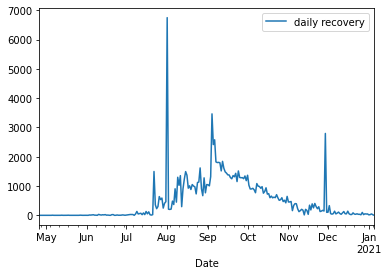

In [163]:
dataB.plot()

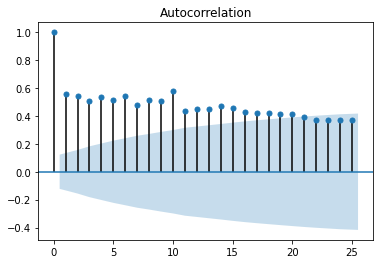

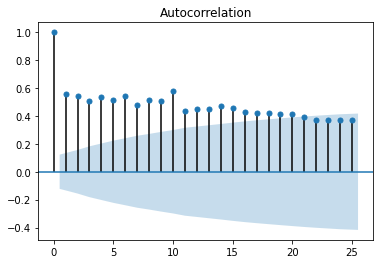

In [164]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataB)

In [182]:
dataB_diff=dataB.diff(periods=1)
dataB_diff = dataB_diff[4:]
dataB_diff

,daily recovery
Date,
2020-04-30,2.0
2020-05-01,1.0
2020-05-02,-3.0
2020-05-03,3.0
2020-05-04,-1.0
...,...
2021-01-01,-31.0
2021-01-02,8.0
2021-01-03,24.0


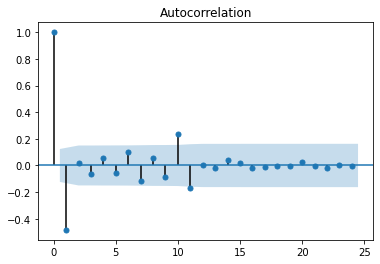

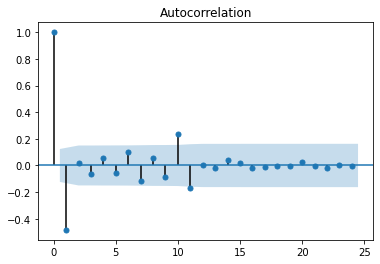

In [183]:
plot_acf(dataB_diff)

In [192]:
Y= dataB.values
Y.size
train1 = Y[0:178]
test1 = Y[178:]
predictions1 = []


In [193]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [194]:
model_arr= AR(train1)
model_arr_fit=model_ar.fit()

In [195]:
predictions1 = model_arr_fit.predict(start=178,end=255)

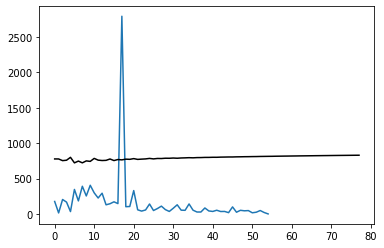

In [196]:
plt.plot(test)
plt.plot(predictions1,color='black')

In [197]:
from statsmodels.tsa.arima_model import ARIMA

In [213]:
model_arima=ARIMA(train,order=(4,1,3))#best fit combo of p,d,q
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

3082.805185775991


In [199]:
import  itertools
p=d=q=range(0,8)
pdq1 = list(itertools.product(p,d,q))
pdq1

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1,

In [200]:
for param in pdq1:
  try:
    model_arima=ARIMA(train,order=param)
    model_arima_fit=model_arima.fit()
    print(param,model_arima_fit.aic)
  except:
    continue 

(0, 0, 0) 3222.210135710053
(0, 0, 1) 3181.2191825982773
(0, 0, 2) 3158.9825910512563
(0, 0, 3) 3152.7979213369827
(0, 0, 4) 3145.410571809195
(0, 0, 5) 3141.0953263810097
(0, 0, 6) 3134.183769626584
(0, 0, 7) 3135.2364267957846
(0, 1, 0) 3178.9588715207497
(0, 1, 1) 3078.9544255460323
(0, 1, 2) 3080.897223271047
(0, 2, 0) 3378.8734218336967
(0, 2, 1) 3171.2684300506558
(1, 0, 0) 3147.654182381125
(1, 0, 1) 3094.705991759304
(1, 0, 2) 3096.666023266519
(1, 1, 0) 3129.093006078525
(1, 1, 1) 3080.897864525252
(1, 1, 2) 3080.710025373784
(1, 1, 3) 3081.8164475114904
(1, 1, 4) 3082.838446173244
(1, 1, 5) 3084.7619562085692
(1, 1, 6) 3084.8201472620617
(1, 2, 0) 3263.4041668982154
(2, 0, 0) 3126.0549276050488
(2, 0, 1) 3096.66665650525
(2, 0, 2) 3096.4336295053517
(2, 1, 0) 3116.3307637262897
(2, 1, 1) 3082.8888086106517
(2, 1, 2) 3081.9614299911673
(2, 1, 3) 3078.814613993566
(2, 1, 4) 3080.8065370867357
(2, 1, 5) 3082.8030387220656
(2, 1, 6) 3083.306714247321
(2, 1, 7) 3088.4522907871865


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning:

invalid value encountered in log



(7, 0, 4) 3103.075960225953
(7, 1, 0) 3091.001910957555
(7, 1, 1) 3087.545085332941
(7, 1, 2) 3088.4843158826593
(7, 1, 3) 3088.219919481344
(7, 2, 0) 3136.1496283664565
(7, 2, 1) 3085.870057169542
(7, 2, 2) 3088.2220586130925
(7, 2, 3) 3089.2717908992395


In [214]:
predictions1= model_arima_fit.forecast(steps=40)[0]
predictions1

array([251.96996902, 362.60737569, 266.78584253, 347.06875472,
       291.01271939, 327.79489462, 316.19045835, 310.56144891,
       336.80583011, 299.81961279, 349.64786007, 297.47762506,
       354.08302436, 303.0018934 , 351.64107634, 314.08229476,
       345.17115124, 327.57892221, 337.86575412, 340.46046293,
       332.41665745, 350.51012785, 330.47692979, 356.68028085,
       332.49131148, 359.08762265, 337.85479384, 358.72911336,
       345.28906692, 357.04842293, 353.29830548, 355.49015035,
       360.57711767, 355.15182474, 366.28295783, 356.59597333,
       370.13721631, 359.83231109, 372.36831402, 364.43693832])

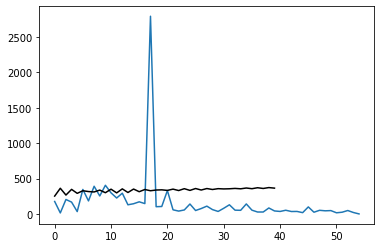

In [215]:
plt.plot(test)
plt.plot(predictions1,color='black')

In [ ]:
SSS